In [211]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [65]:
df_players = pd.read_csv(r'data/players.csv')

df_week1 = pd.read_csv(r'data/week1.csv')
df_week2 = pd.read_csv(r'data/week2.csv')
df_week3 = pd.read_csv(r'data/week3.csv')
df_week4 = pd.read_csv(r'data/week4.csv')
df_week5 = pd.read_csv(r'data/week5.csv')
df_week6 = pd.read_csv(r'data/week6.csv')
df_week7 = pd.read_csv(r'data/week7.csv')
df_week8 = pd.read_csv(r'data/week8.csv')

In [64]:
print(df_players)
columns = ["nflId","height","weight","officialPosition"]

      nflId height  weight officialPosition
0     25511    6-4     225               QB
1     28963    6-5     240               QB
2     29550    6-4     328                T
3     29851    6-2     225               QB
4     30078    6-2     228               QB
...     ...    ...     ...              ...
1674  53991    6-1     320               DT
1675  53994    6-5     300                C
1676  53999    6-4     312               DT
1677  54006    6-6     330                T
1678  54038    6-6     245               QB

[1679 rows x 4 columns]


In [63]:
print(df_players[columns])
df_players = df_players[columns]
print(df_week1.columns)

      nflId height  weight officialPosition
0     25511    6-4     225               QB
1     28963    6-5     240               QB
2     29550    6-4     328                T
3     29851    6-2     225               QB
4     30078    6-2     228               QB
...     ...    ...     ...              ...
1674  53991    6-1     320               DT
1675  53994    6-5     300                C
1676  53999    6-4     312               DT
1677  54006    6-6     330                T
1678  54038    6-6     245               QB

[1679 rows x 4 columns]
Index(['gameId', 'playId', 'nflId', 'frameId', 'time', 'jerseyNumber', 'team',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event'],
      dtype='object')


In [66]:
column_weeks = ['gameId','playId','nflId','s','a']
#Na values indicate that the playId is the ball so we will choose to drop the rows with these values.
df_week1['nflId'].isna().value_counts()

False    1069508
True       48614
Name: nflId, dtype: int64

In [67]:
df_week1 = df_week1[column_weeks].dropna(axis=0)
df_week2 = df_week2[column_weeks].dropna(axis=0)
df_week3 = df_week3[column_weeks].dropna(axis=0)
df_week4 = df_week4[column_weeks].dropna(axis=0)
df_week5 = df_week5[column_weeks].dropna(axis=0)
df_week6 = df_week6[column_weeks].dropna(axis=0)
df_week7 = df_week7[column_weeks].dropna(axis=0)
df_week8 = df_week8[column_weeks].dropna(axis=0)

weeks_list = [df_week1,df_week2,df_week3,df_week4,df_week5,df_week6,df_week7,df_week8]

In [68]:
joined_weeks_list = pd.concat(weeks_list,axis=0)
print(joined_weeks_list)

            gameId  playId    nflId     s     a
0       2021090900      97  25511.0  0.29  0.30
1       2021090900      97  25511.0  0.23  0.11
2       2021090900      97  25511.0  0.16  0.10
3       2021090900      97  25511.0  0.15  0.24
4       2021090900      97  25511.0  0.25  0.18
...            ...     ...      ...   ...   ...
978886  2021110100    4433  53449.0  1.43  3.20
978887  2021110100    4433  53449.0  1.34  2.85
978888  2021110100    4433  53449.0  1.32  2.42
978889  2021110100    4433  53449.0  1.29  2.18
978890  2021110100    4433  53449.0  1.25  1.75

[7952692 rows x 5 columns]


In [55]:
#For each player we want to figure out what their mean speed and acceleration has been.
mean_speed = joined_weeks_list.groupby(['nflId']).mean().reset_index()[['nflId','s']]
print(mean_speed)

mean_acceleration = joined_weeks_list.groupby(['nflId']).mean().reset_index()[['nflId','a']]
print(mean_acceleration)

        nflId         s
0     25511.0  1.391120
1     28963.0  1.259974
2     29550.0  1.682829
3     29851.0  1.999297
4     30078.0  1.811228
...       ...       ...
1674  53991.0  1.591094
1675  53994.0  1.313800
1676  53999.0  1.229605
1677  54006.0  1.687108
1678  54038.0  4.925670

[1679 rows x 2 columns]
        nflId         a
0     25511.0  1.652415
1     28963.0  1.487767
2     29550.0  1.316711
3     29851.0  1.728276
4     30078.0  1.573563
...       ...       ...
1674  53991.0  1.213125
1675  53994.0  1.099800
1676  53999.0  1.131974
1677  54006.0  1.289822
1678  54038.0  2.034742

[1679 rows x 2 columns]


In [135]:
#joining the datasets unto eachother 

df1 = df_players.merge(mean_acceleration,on='nflId')
df = df1.merge(mean_speed,left_on='nflId',right_on='nflId')
df = df.rename(columns={'a':'a_avg','s':'s_avg'})

In [136]:
df = df[['height','weight','officialPosition','a_avg','s_avg']]
for i in range(len(df)):
    df['height'][i] = int(df['height'][i][0])*0.3048 + int(df['height'][i][2])*0.3048/10

C:\Users\User\AppData\Local\Temp\ipykernel_8624\2211777729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'][i] = int(df['height'][i][0])*0.3048 + int(df['height'][i][2])*0.3048/10


       height  weight officialPosition     a_avg     s_avg
0     1.95072     225               QB  1.652415  1.391120
1      1.9812     240               QB  1.487767  1.259974
2     1.95072     328                T  1.316711  1.682829
3     1.88976     225               QB  1.728276  1.999297
4     1.88976     228               QB  1.573563  1.811228
...       ...     ...              ...       ...       ...
1674  1.85928     320               DT  1.213125  1.591094
1675   1.9812     300                C  1.099800  1.313800
1676  1.95072     312               DT  1.131974  1.229605
1677  2.01168     330                T  1.289822  1.687108
1678  2.01168     245               QB  2.034742  4.925670

[1679 rows x 5 columns]


<AxesSubplot:xlabel='weight', ylabel='height'>

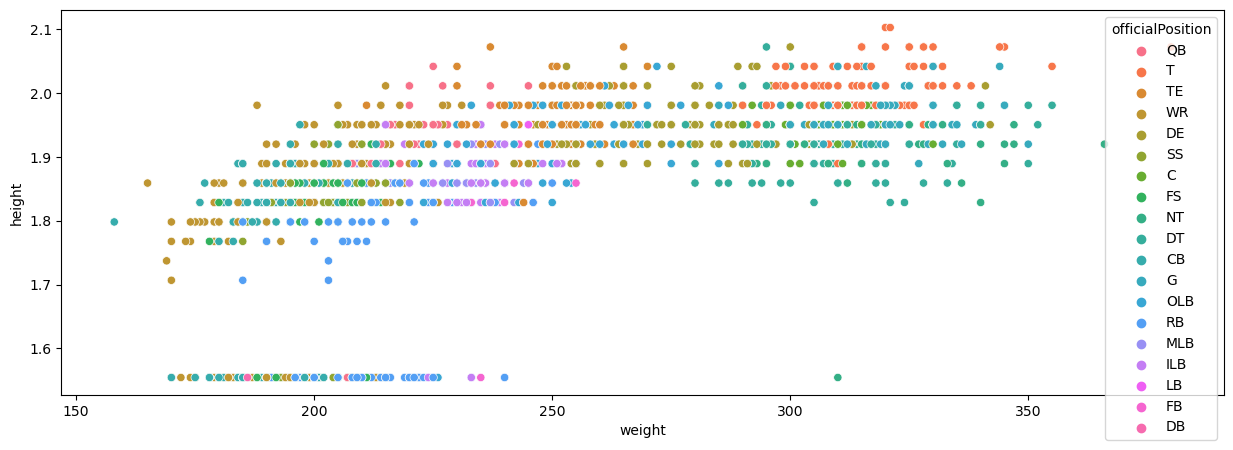

In [161]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x=df['weight'],y=df['height'],hue=df['officialPosition'])

<AxesSubplot:xlabel='s_avg', ylabel='height'>

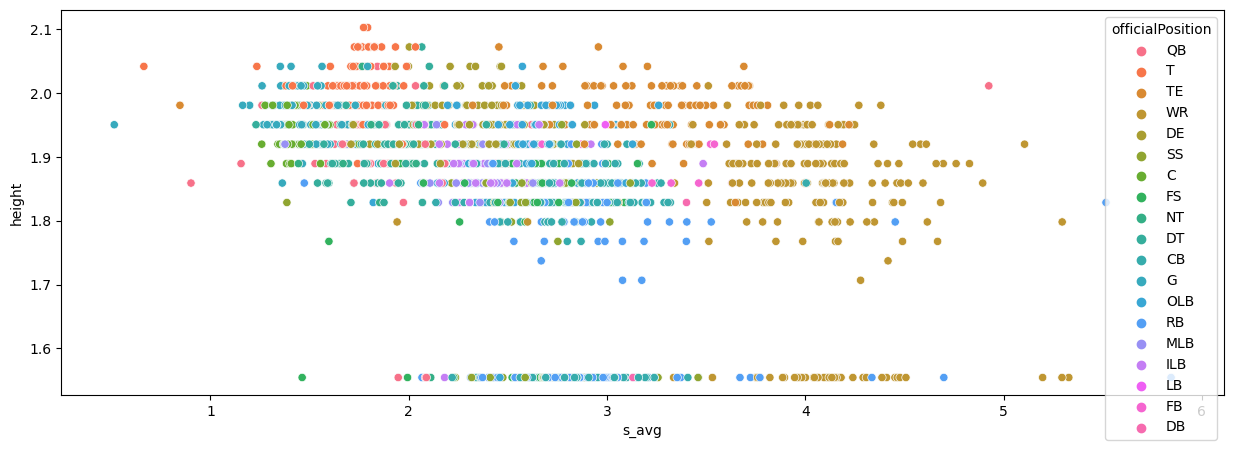

In [163]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x=df['s_avg'],y=df['height'],hue=df['officialPosition'])

In [170]:
y = pd.get_dummies(df['officialPosition'])
x = df.drop('officialPosition',axis=1)

       height  weight     a_avg     s_avg
0     1.95072     225  1.652415  1.391120
1      1.9812     240  1.487767  1.259974
2     1.95072     328  1.316711  1.682829
3     1.88976     225  1.728276  1.999297
4     1.88976     228  1.573563  1.811228
...       ...     ...       ...       ...
1674  1.85928     320  1.213125  1.591094
1675   1.9812     300  1.099800  1.313800
1676  1.95072     312  1.131974  1.229605
1677  2.01168     330  1.289822  1.687108
1678  2.01168     245  2.034742  4.925670

[1679 rows x 4 columns]


In [174]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
print(neigh.score(x_test,y_test))

0.4732142857142857


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [194]:
current_highest_score = 0
current_highest_k = 1
k_values = [k for k in range(1,50)]
scores = []
for k in range(1,50):
    neigh_1 = KNeighborsClassifier(n_neighbors=k)
    neigh_1.fit(x_train,y_train)
    acc = neigh_1.score(x_test,y_test)
    scores.append(acc)
    if acc > current_highest_score:
        current_highest_k = k
        current_highest_score = acc
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [197]:
print(current_highest_score)
print(current_highest_k)

0.5684523809523809
1


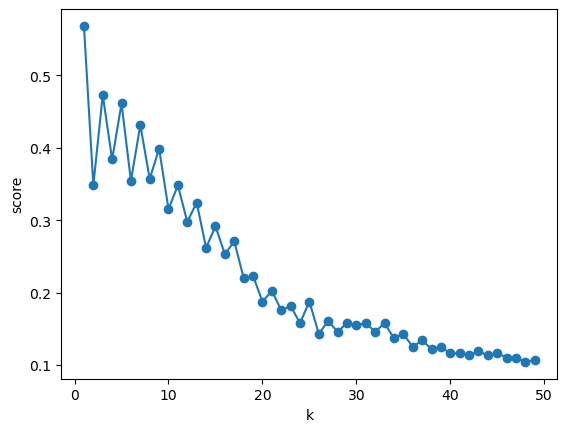

In [202]:
plt.scatter(k_values,scores)
plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [217]:
#pairwise testing to see which features work

x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=1)
sfs = SequentialFeatureSelector(knn,n_features_to_select=2)

In [218]:
sfs.fit(x_train_2,y_train_2)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=1),
                          n_features_to_select=2)

In [221]:
sfs.get_support(indices=True)
#height and weight are the best predictors of the position.

array([1, 3], dtype=int64)